In [14]:
import pandas as pd

# Define the correct column names (from UCI site)
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Step 1: Load only the Cleveland dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, header=None, names=column_names, na_values='?')

In [15]:
# Step 2: Drop rows with missing values
df.dropna(inplace=True)

# Categorical columns
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical:
    df[col] = df[col].astype(int).astype('category')

# Numerical columns
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical:
    df[col] = df[col].astype(float)

# Target column: convert to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if int(x) > 0 else 0).astype(int)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       297 non-null    float64 
 1   sex       297 non-null    category
 2   cp        297 non-null    category
 3   trestbps  297 non-null    float64 
 4   chol      297 non-null    float64 
 5   fbs       297 non-null    category
 6   restecg   297 non-null    category
 7   thalach   297 non-null    float64 
 8   exang     297 non-null    category
 9   oldpeak   297 non-null    float64 
 10  slope     297 non-null    category
 11  ca        297 non-null    category
 12  thal      297 non-null    category
 13  target    297 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 19.7 KB
None


In [16]:
print(df.head())

    age sex cp  trestbps   chol fbs restecg  thalach exang  oldpeak slope ca  \
0  63.0   1  1     145.0  233.0   1       2    150.0     0      2.3     3  0   
1  67.0   1  4     160.0  286.0   0       2    108.0     1      1.5     2  3   
2  67.0   1  4     120.0  229.0   0       2    129.0     1      2.6     2  2   
3  37.0   1  3     130.0  250.0   0       0    187.0     0      3.5     3  0   
4  41.0   0  2     130.0  204.0   0       2    172.0     0      1.4     1  0   

  thal  target  
0    6       0  
1    3       1  
2    7       1  
3    3       0  
4    3       0  


In [17]:
#step 3: One-hot encoding of categorical columns
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)
print(df_encoded.head())


    age  trestbps   chol  thalach  oldpeak  target  sex_1   cp_2   cp_3  \
0  63.0     145.0  233.0    150.0      2.3       0   True  False  False   
1  67.0     160.0  286.0    108.0      1.5       1   True  False  False   
2  67.0     120.0  229.0    129.0      2.6       1   True  False  False   
3  37.0     130.0  250.0    187.0      3.5       0   True  False   True   
4  41.0     130.0  204.0    172.0      1.4       0  False   True  False   

    cp_4  ...  restecg_1  restecg_2  exang_1  slope_2  slope_3   ca_1   ca_2  \
0  False  ...      False       True    False    False     True  False  False   
1   True  ...      False       True     True     True    False  False  False   
2   True  ...      False       True     True     True    False  False   True   
3  False  ...      False      False    False    False     True  False  False   
4  False  ...      False       True    False    False    False  False  False   

    ca_3  thal_6  thal_7  
0  False    True   False  
1   True   Fal

In [19]:
df_encoded.isnull().sum()

,0
age,0
trestbps,0
chol,0
thalach,0
oldpeak,0
target,0
sex_1,0
cp_2,0
cp_3,0
cp_4,0


In [20]:
# step 4: Scaling of numerical columns

from sklearn.preprocessing import StandardScaler
# Select numeric columns to scale
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


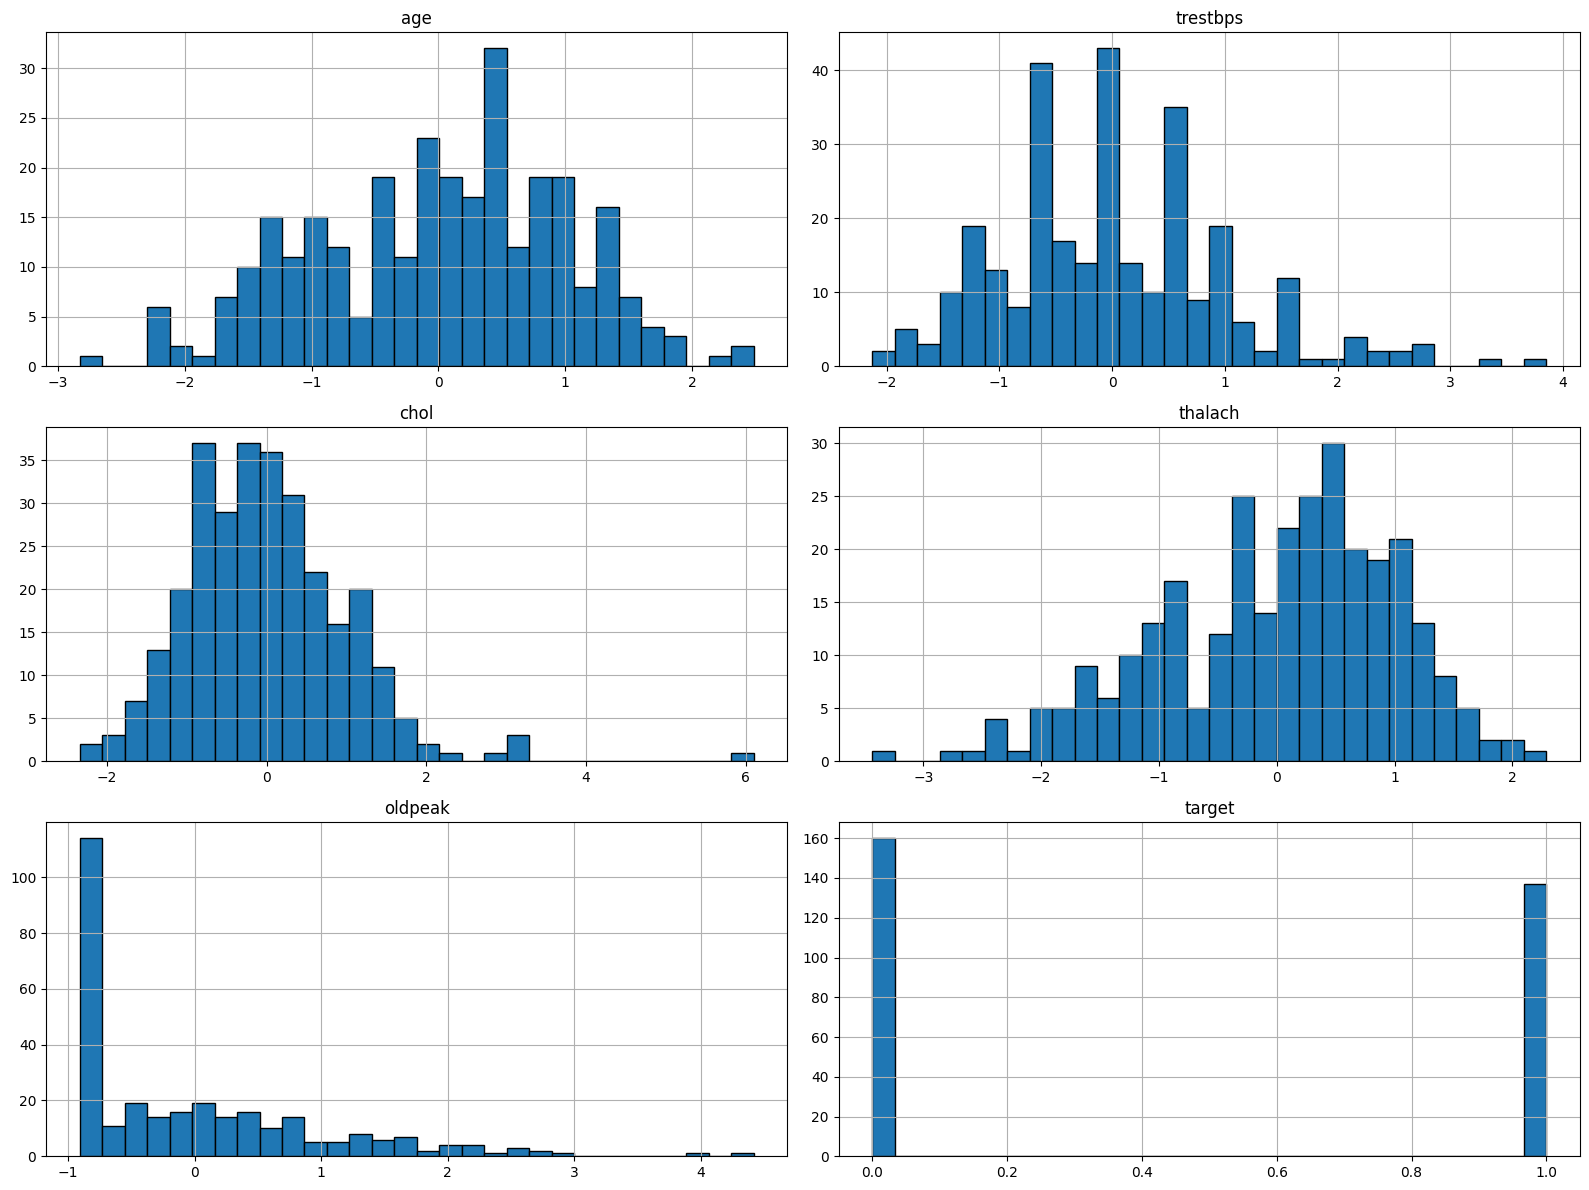

In [22]:
# step 5: Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
df_encoded.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


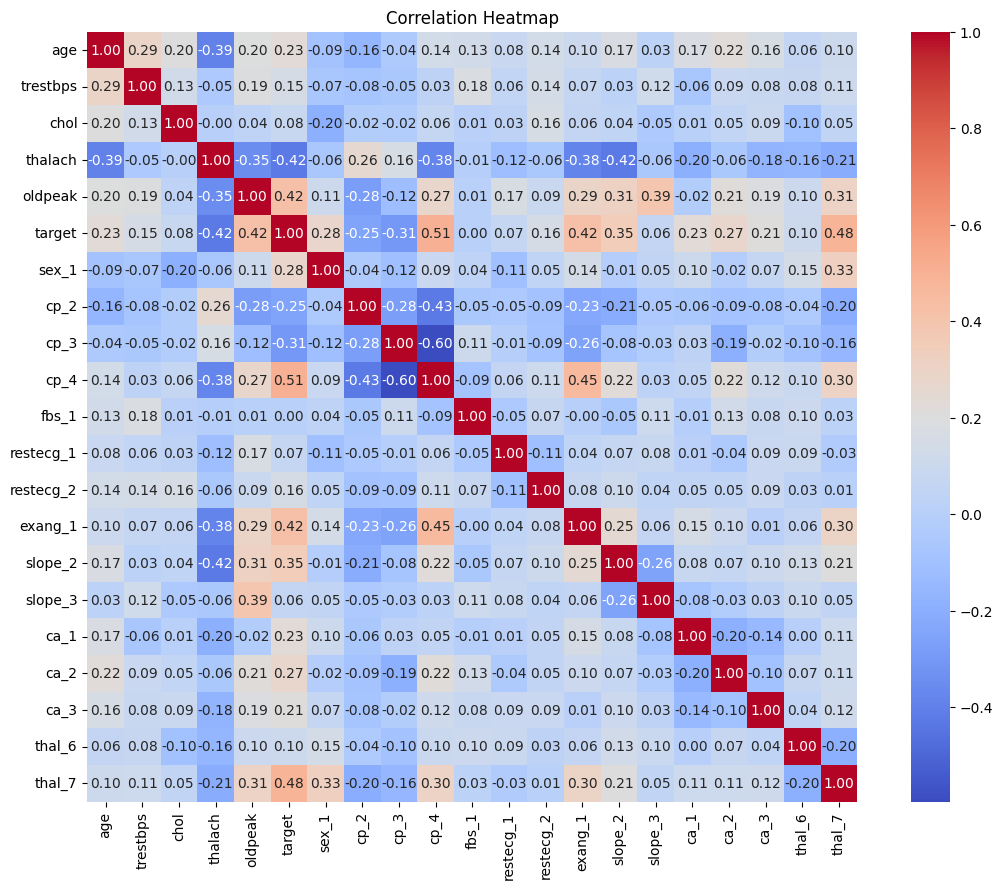

In [23]:
# correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


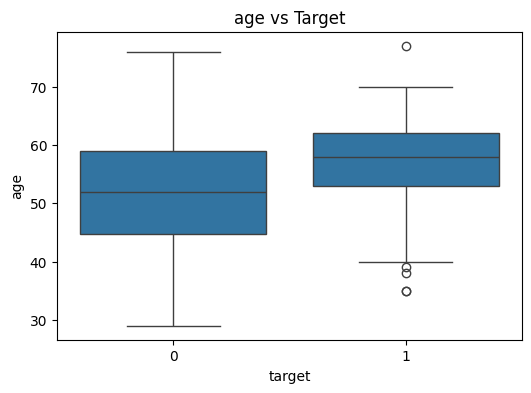

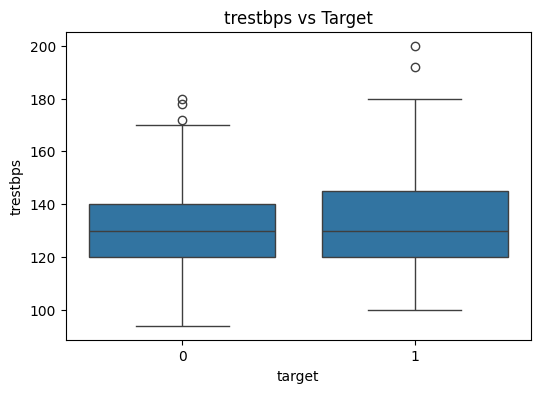

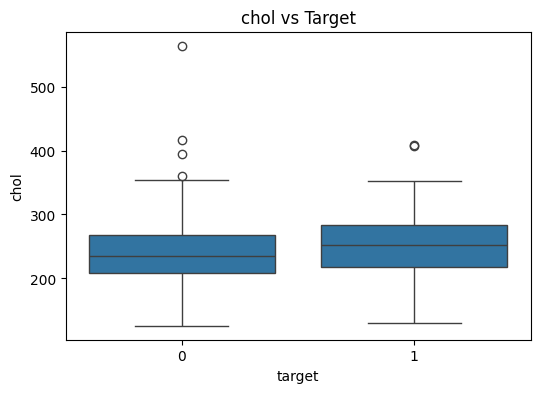

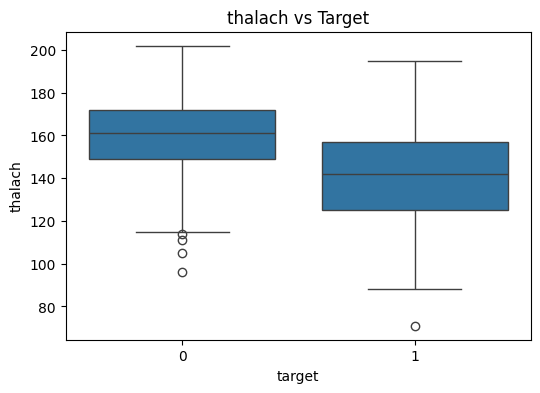

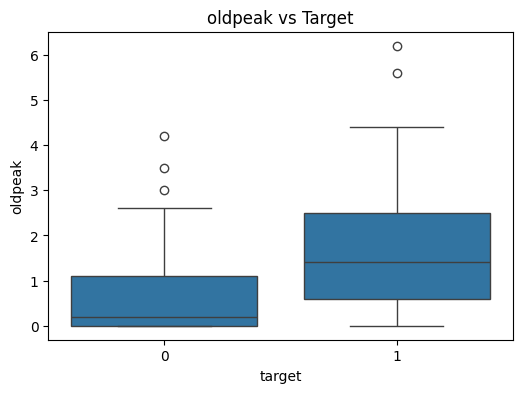

In [24]:
# Boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
    plt.show()


In [25]:
# Save to CSV
df_encoded.to_csv('heart_cleaned.csv', index=False)